# Analysis of E-Sports Performance by Country

- Video: https://www.youtube.com/watch?v=F6VjG_wEhI0

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ x ] NO - keep private

# Overview

While video games have existed for many decades, professional gaming is a relatively new industry that is prime for growth. Players from all around the world compete in tournaments on a grand scale all throughout the year, in hopes of placing above their competitors. Star players come from all walks of life and all different countries. However, followers of esports ill note that one country comes to mind in popular culture when it comes to who is constantly a cut above the rest: South Korea. This project focuses on examining the relationship between GDP/screen time per capita, and esports performance, and determining if there is a deviation in expected performance of South Korean players versus others. 

We inspected the countries that win the most from esports by harvesting data from multiple datasets to get info about a countries GDP, esports earnings, and average number of hours a citizen will spend sitting in front of a computer. Through a process of cleaning, wrangling, merging, and analyzing data, we found that there is indeed an anomoly in esports performance by South Korea.

# Names

- Guan Li
- Stephanie Felix 
- Yinshin Li
- Eric Hom
- Jason Sather

<a id='research_question'></a>
# Research Question

We know that Koreans living in South Korea have one of the highest esports players to population count ratios. Due to this, we want to investigate if there is also a significant anomaly in earnings. To do this, we are considering factors such as GDP and average computer screen time per capita to research: is South Korea’s esports prize earnings an anomaly amongst countries given a country's GDP and average computer screen time per capita per country? if so by how much?

<a id='background'></a>

## Background & Prior Work

South Korea has made a strong reputation for itself in the world of esports. For such a country with a relatively small population, it constantly produces seemingly endless numbers of top-tier competitive players across all genres and titles of video games. To what extent is this statement true? We wish to investigate this and analyze the data surrounding this, including any potential confounding variables that might explain the above.

South Korea makes the third place by price money won in esports, which the first and second place countries are ten times its size (China and United States). Korea also has a high average internet speed that ranks #2 among all the countries. Consistent and high speed internet is highly revelant for allowing players to play at the highest level without lag. The gaming culture in Korea is also in fact socially accepted, being put next to pop stars and famous athletes. The culture aspect might play a larger part than expected. Unlike many other countries in the West, gaming is much more mainstream and seen as a respected activity.

We felt that screen time and GDP were two of the most suitable metrics to examine against esports earnings. Screen time is a fairly clear metric to use. The more time spent on computers and gaming by the general population, the greater the talent pool for professional gamers becomes. GDP is slightly more nuanced. Unlike many popular physical sports like Soccer, Basketball, Tennis, Cricket, or Volleyball, the barrier the entry for professional gaming is much higher. Some of the physical sports above require nothing more a ball, however, when it comes to video games, they require either a gaming console or powerful computer hardware. This presents a large financial hurdle (especially for hardware to remain competitive), which may be less accessible for those in countries with lower GDPs, and in return, shrinking the talent pool. 

ESPN.org (22 May 2020) The past, present and future of the Shanghai Dragons https://www.espn.com/esports/story/_/id/29210259/the-present-future-shanghai-dragons

Esports Insider (03 May 2022) Esports Around the World: South Korea https://esportsinsider.com/2022/05/esports-around-the-world-south-korea

Get Hyped Sports (18 Feb 2022) Why Does South Korea Dominate Esports? Your Sports and Gaming Guide. https://gethypedsports.com/why-does-south-korea-dominate-esports/

Korea Economic Institute of America (02 Sept 2022) Esports Rises as a Viable Career Field for Young South Koreans https://keia.org/the-peninsula/esports-rises-as-a-viable-career-field-for-young-south-koreans/

# Hypothesis



Fact: South Korea's population has a very high proportion of professional competitive gamers when compared to other nations.

Hypothesis: If there is a correlation between independent variables such as a nation's GDP, the average number of computer screen hours spent per capita, and the dependent variable of esports earnings; we expect that South Korea will be within the top 90th percentile when ranked against all nations by that dependent variable if the dependent variable has a positive correlation with the independent variable and we expect that it will be in the 10th percentile when ranked against all nations by that dependent variable if the dependent variable has a negative correlation with the independent variable.

We think that this is will be the outcome because we would expect the country with the highest GDP and average computer screen time per capita to have relatively high factors that are positively correlated with the esports earnings a nation has and relatively low in factors that are negatively correlated with the esports earnings a nation has.


# Dataset(s)

- Dataset Name: highest_earning_players_df
- Link to dataset: https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game?select=highest_earning_players.csv
- Number of observations: 1000
- Description: This dataset provides the earning of separate players, containing players from multiple countries and multiple types of games, focusing on the player earnings from 1998 to 2020.

- Dataset Name: highest_earining_teams_df
- Link to dataset: https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game?select=highest_earning_teams.csv
- Number of observations: 928
- Description:  This dataset provides the earning of whole teams and the game that they play along with how many tournaments they won.  We can go into this dataset and the figure out which teams are the most dominant and earn the most and then look at the player nationality composition of all the teams to help figure out what country is dominant

- Dataset Name: GDP
- Link to dataset: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
- Number of observations: 266
- Description: This dataset provides the GDP of every country's every year GDP reports till 2021. We want to limit the year to 1998 to 2020 to work with the highest_earning player/team dataset.

- Dataset Name: screen-time
- Link to dataset: https://www.statista.com/statistics/273829/average-game-hours-per-day-of-video-gamers-in-selected-countries/
- Number of observations: 44
- Description: This data sets provides the average screen time per capita. We use this dataset to find the linear regression with screentime and GDP as the dependent variable. and earing as the dependent.

- Data Combination: In order to perform analysis on these datasets, we needed to clean and wrangle the data for each dataset separately. Then, we merged the relevant data from each dataset into one large dataframe. This resulted in one dataframe with countries, esports earnings, average GDP, and screentime per capita that we could perform analysis on.

# Setup

In [1]:
# Imports (copied from discussion 5)
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pycountry
import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

In [2]:
highest_earning_players_df = pd.read_csv("data/highest_earning_players.csv")
highest_earning_players_df.head()
# print(highest_earning_players_df.shape)

country_and_conti_df = pd.read_csv("data/country-and-continent-codes-list.csv")
country_and_conti_df.head()
# print(highest_earning_players_df.shape)

highest_earning_teams_df = pd.read_csv("data/highest_earning_teams.csv")
highest_earning_teams_df = highest_earning_teams_df.sort_values('TotalUSDPrize', ascending=False)
highest_earning_teams_df.head(30)
# print(highest_earning_teams_df.shape)


,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena
505,169,Vici Gaming,11182792.92,121,Dota 2,Multiplayer Online Battle Arena
506,227,LGD Gaming,10072755.42,79,Dota 2,Multiplayer Online Battle Arena
507,185,Virtus.pro,10037385.11,125,Dota 2,Multiplayer Online Battle Arena
508,507,Wings Gaming,9739247.35,24,Dota 2,Multiplayer Online Battle Arena
509,623,Paris Saint-Germain Esports,9066946.69,27,Dota 2,Multiplayer Online Battle Arena


In [3]:
highest_earning_teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena


In [4]:
highest_earning_players_df = highest_earning_players_df.sort_values('TotalUSDPrize', ascending=False)
highest_earning_players_df.head(40)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
105,3145,Kuro,Takhasomi,KuroKy,de,5193382.81,Dota 2,Multiplayer Online Battle Arena
106,14671,Amer,Al-Barkawi,Miracle-,jo,4798043.68,Dota 2,Multiplayer Online Battle Arena
107,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118.16,Dota 2,Multiplayer Online Battle Arena
108,25335,Maroun,Merhej,GH,lb,4193412.69,Dota 2,Multiplayer Online Battle Arena
109,12133,Lasse,Urpalainen,Matumbaman,fi,3765369.04,Dota 2,Multiplayer Online Battle Arena


In [5]:
# Grab the GDP DATA
GDP = pd.read_csv("data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4697536.csv")

In [6]:
GDP.head()
# print(GDP.shape)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,4.182834e+10,4.486261e+10,4.947892e+10,5.351484e+10,6.960079e+10,8.605778e+10,9.164915e+10,9.112455e+10,1.034158e+11,1.153450e+11,1.346714e+11,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11,1.601340e+11,1.362973e+11,1.525183e+11,1.861446e+11,2.041398e+11,2.175386e+11,2.532240e+11,2.734028e+11,2.382554e+11,2.365269e+11,2.401201e+11,2.696369e+11,2.684137e+11,2.821850e+11,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.7

# Data Cleaning

For the top earning players and team dataset, we noticed that results stemming from Dota 2 was massively dominating the earnings data.

Therefore, we removed dota as it would be an outlier with massive sway and potentially ruin the analysis.

We also got all Korean top earners.

Later we took the GDP dataset and then pruned it so that it only had the yearly same years and same countries that were in the top earning dataset. All years prior to 1998 were dropped, since the eSports earnings dataset begins in 1998. We also added a new column that said average GDP of a country from year 1998 to 2022.


First we clean up the data from highest_earining_teams_df and highest_earining_players_df

In [7]:

highest_earning_players_df.head(100)

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
...,...,...,...,...,...,...,...,...
12,11788,Jonathan,Jablonowski,ELiGE,us,930696.42,Counter-Strike: Global Offensive,First-Person Shooter
13,8635,Nick,Cannella,nitr0,us,920151.73,Counter-Strike: Global Offensive,First-Person Shooter
168,11722,Ilya,Ilyuk,Lil,ua,917449.86,Dota 2,Multiplayer Online Battle Arena
202,3636,Jun Sik,Bae,Bang,kr,915451.46,League of Legends,Multiplayer Online Battle Arena


Check for any missing inputs by searching for null values in rows

In [8]:
# Check for any missing inputs:
print(highest_earning_teams_df.isnull().values.any()) #NONE
print(highest_earning_players_df.isnull().values.any()) #NONE
print(GDP.isnull().values.any()) # There are missing value in the dataset for GDP

False
False
True


Begin to peer into the dataset to get mental conception of data

In [9]:
# Check for the different columns
print(highest_earning_players_df.columns)

# Find all unique in genre and country code inputs.
print(highest_earning_players_df.Genre.unique())
# print(highest_earning_teams_df.Genre.unique())
print(highest_earning_players_df.CountryCode.unique())

# We want to look at data from just First-Person Shooter and MOBA since they are the korean dominate fields.
he_p_MOBA = highest_earning_players_df[highest_earning_players_df.Genre == "Multiplayer Online Battle Arena"]
he_t_MOBA = highest_earning_teams_df[highest_earning_teams_df.Genre == "Multiplayer Online Battle Arena"]

# FPS
he_p_FPS = highest_earning_players_df[highest_earning_players_df.Genre == "First-Person Shooter"]
he_t_FPS = highest_earning_teams_df[highest_earning_teams_df.Genre == "First-Person Shooter"]

# 400 data entries:
he_p_FPS.head(1000) 
print(he_p_FPS.head())

Index(['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'CountryCode',
       'TotalUSDPrize', 'Game', 'Genre'],
      dtype='object')
['Multiplayer Online Battle Arena' 'Battle Royale' 'First-Person Shooter'
 'Strategy' 'Collectible Card Game']
['dk' 'fi' 'au' 'fr' 'de' 'jo' 'bg' 'lb' 'pk' 'us' 'cn' 'ee' 'se' 'il'
 'ro' 'ca' 'at' 'my' 'ru' 'ua' 'sg' 'no' 'mo' 'gb' 'kr' 'nl' 'hk' 'br'
 'mk' 'ar' 'pl' 'ph' 'sk' 'ba' 'by' 'tw' 'hr' 'kz' 'ch' 'mx' 'be' 'cz'
 'tr' 'it' 'lv' 'es' 'jp' 'uz' 'si' 'vn' 'lt' 'th' 'ie' 'gi' 'gr' 'cu']
   PlayerId NameFirst   NameLast CurrentHandle CountryCode  TotalUSDPrize  \
0      3883     Peter  Rasmussen       dupreeh          dk     1822989.41   
1      3679   Andreas   Højsleth         Xyp9x          dk     1799288.57   
2      3885   Nicolai     Reedtz        dev1ce          dk     1787489.88   
3      3672     Lukas  Rossander        gla1ve          dk     1652350.75   
4     17800      Emil       Reif        Magisk          dk     1416448.64   

 

Seperate the data with korean and non-korean gamer earning data

In [10]:
# Seperate the data with korean and non-korean:
Korean_players = highest_earning_players_df[highest_earning_players_df.CountryCode == "kr"]
Korean_players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
200,3832,Sang Hyeok,Lee,Faker,kr,1257615.87,League of Legends,Multiplayer Online Battle Arena
201,6466,Ho Seong,Lee,Duke,kr,954620.62,League of Legends,Multiplayer Online Battle Arena
202,3636,Jun Sik,Bae,Bang,kr,915451.46,League of Legends,Multiplayer Online Battle Arena
203,3836,Jae Wan,Lee,Wolf,kr,913084.70,League of Legends,Multiplayer Online Battle Arena
501,1126,Sung Choo,Cho,Maru,kr,886795.83,Starcraft II,Strategy


In [11]:
# non-korean:
non_Korean_players = highest_earning_players_df[highest_earning_players_df.CountryCode != "kr"]
non_Korean_players.head(2000)
# non_Korean_players.shape

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
...,...,...,...,...,...,...,...,...
895,83084,Tseng-Yung,Chun,Kato,tw,26666.67,Arena of Valor,Multiplayer Online Battle Arena
896,83085,En Hao,Chen,Gua,tw,26666.67,Arena of Valor,Multiplayer Online Battle Arena
897,70343,-,-,Rain,tw,26645.00,Arena of Valor,Multiplayer Online Battle Arena
898,12241,Komklit,Wongsawat,O7T-V1,th,25941.03,Arena of Valor,Multiplayer Online Battle Arena


Purge null data

In [12]:
#Check for NA inputs:
highest_earning_players_df.notna()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
100,True,True,True,True,True,True,True,True
101,True,True,True,True,True,True,True,True
102,True,True,True,True,True,True,True,True
103,True,True,True,True,True,True,True,True
104,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
895,True,True,True,True,True,True,True,True
896,True,True,True,True,True,True,True,True
897,True,True,True,True,True,True,True,True
898,True,True,True,True,True,True,True,True


We see that DOTA has abnormally high prize pools, for the sake of discussion, we purge DOTA2, as it seems too influential

In [13]:
dota_p_removed = highest_earning_players_df[highest_earning_players_df.Game != "Dota 2"]
dota_t_removed = highest_earning_teams_df[highest_earning_teams_df.Game != "Dota 2"]

dota_p_removed.Game.unique()

array(['Fortnite', 'Counter-Strike: Global Offensive',
       'League of Legends', 'Starcraft II', 'PUBG', 'Hearthstone',
       'Arena of Valor', 'Heroes of the Storm', 'Overwatch'], dtype=object)

Get a conception of GDP database

In [14]:
GDP.head(1000)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,3.652148e+10,4.182834e+10,4.486261e+10,4.947892e+10,5.351484e+10,6.960079e+10,8.605778e+10,9.164915e+10,9.112455e+10,1.034158e+11,1.153450e+11,1.346714e+11,1.706543e+11,1.743870e+11,1.672663e+11,1.749180e+11,1.601340e+11,1.362973e+11,1.525183e+11,1.861446e+11,2.041398e+11,2.175386e+11,2.532240e+11,2.734028e+11,2.382554e+11,2.365269e+11,2.401201e+11,2.696369e+11,2.684137e+11,2.821850e+11,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.7

 Clean up The GDP Datasets:

 Remove all NA/ values in the datasets.

 Esports Earnings datasets are based on years 1998-2020, so we want to filter the GDP data to only include these years

In [15]:
# Clean up The GDP Datasets:
# Remove all NA/ values in the datasets.
# Esports Earnings datasets are based on years 1998-2020, so we want to filter the GDP data to only include these years
colmns = ['Country Name','Country Code', '1998', '1999','2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'] 
#GDP_sub = GDP[GDP['nationality'].isin(options)] 
GDP_sub = pd.DataFrame(GDP, columns = colmns)

GDP_sub.head()

,Country Name,Country Code,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09
1,Africa Eastern and Southern,AFE,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11
4,Angola,AGO,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10


add an average GDP over years column

In [16]:
GDP_pruned_years = GDP.drop(GDP.columns[4:42],axis=1,inplace=False)  #limits years to 1998 - current so
# PRUNE BABYYYY
GDP_pruned_years.head()

#then we add an average GDP over years column

GDP_with_average = GDP_pruned_years

GDP_with_average['average_GDP'] = GDP_with_average.iloc[:, 4:].mean(axis=1)  #idk why axis = 1 here...

GDP_with_average.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,average_GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN,2.504202e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.658141e+11,2.621722e+11,2.839254e+11,2.588186e+11,2.648698e+11,3.526585e+11,4.388338e+11,5.122111e+11,5.759214e+11,6.611793e+11,7.082869e+11,7.192167e+11,8.604783e+11,9.644185e+11,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN,7.045424e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010931e+10,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN,1.402300e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.301068e+11,1.375210e+11,1.404103e+11,1.480128e+11,1.769380e+11,2.046445e+11,2.540926e+11,3.105575e+11,3.933052e+11,4.617914e+11,5.664808e+11,5.070436e+11,5.915958e+11,6.709830e+11,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN,5.165981e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169956e+10,1.094365e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN,6.112168e+10


In [17]:
player_countries = highest_earning_players_df.CountryCode.unique()
alpha_3_codes = set()
for country in player_countries:
    country_obj = pycountry.countries.get(alpha_2=country.upper())
    alpha_3_codes.add(country_obj.alpha_3)

non_gamer_country_gdp = GDP_with_average[~GDP_with_average['Country Code'].isin(alpha_3_codes)]

print(GDP_with_average.shape)
print(non_gamer_country_gdp.shape)


(266, 30)
(211, 30)


# Data Analysis & Results

CountryCode
kr    251
cn    168
us    114
se     45
fr     37
ca     37
dk     36
tw     34
dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


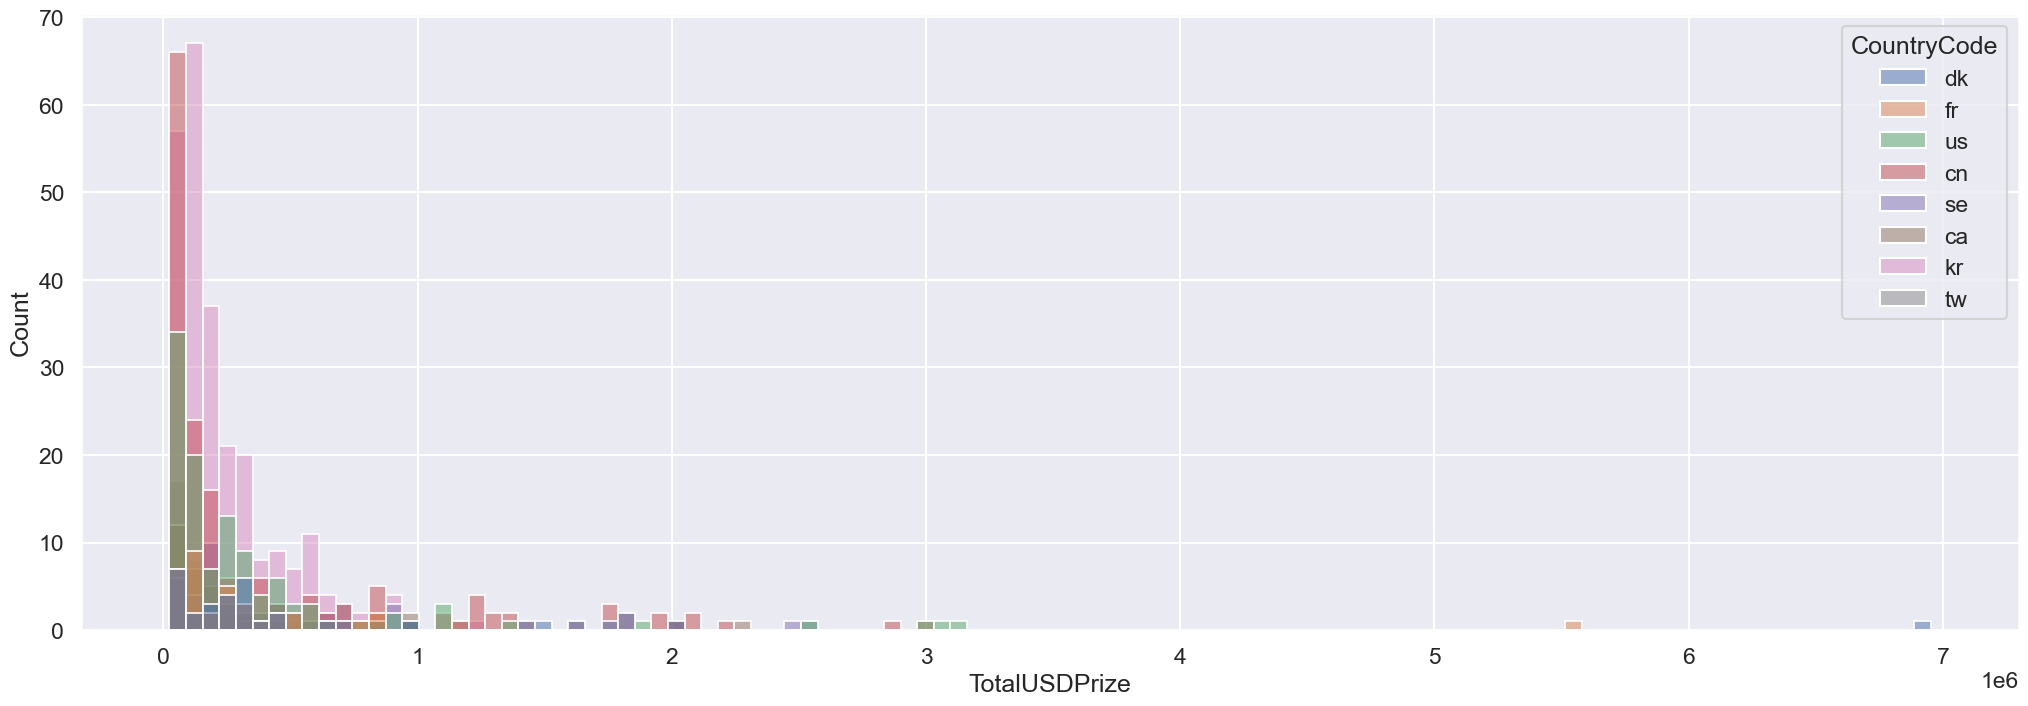

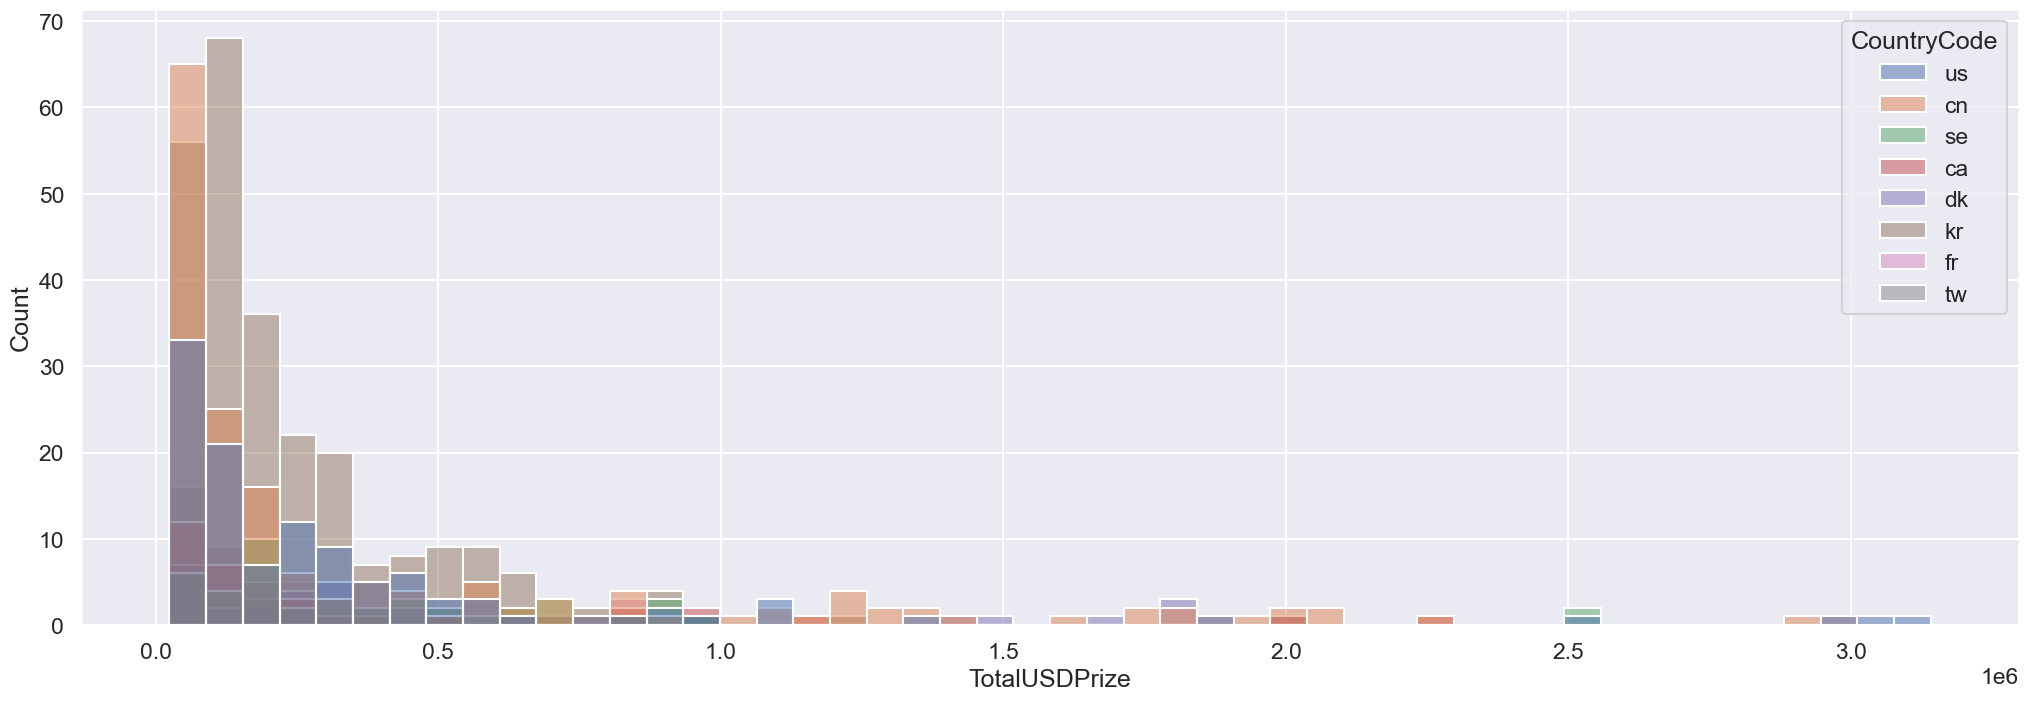

In [18]:
# highest_earning_players_df[highest_earning_players_df.CountryCode == "kr"]
country_counts = highest_earning_players_df.value_counts("CountryCode")
print(country_counts[:8])
top_countries = ['kr', 'cn', 'us', 'se', 'fr', 'ca', 'dk', 'tw']
fig,ax = plt.subplots(figsize =(25, 8))
earning_top_countries = highest_earning_players_df[highest_earning_players_df.CountryCode.isin(top_countries)]
plotEarnings = sns.histplot(data = earning_top_countries, x = "TotalUSDPrize", hue = "CountryCode")
print(plotEarnings)
# print(highest_earning_players_df.columns)

remove_outliers = earning_top_countries[earning_top_countries.TotalUSDPrize<=4000000]
f2,ax = plt.subplots(figsize =(25, 8))
plotEarnings_nonOutliers = sns.histplot(data = remove_outliers, x = "TotalUSDPrize", hue = "CountryCode")


#plotting the percentage of earnings among countries
#group_by_top_countries = d

The graphs above show the earnings of the top countries contry by color code.

Here, we can tell that most of the players earn less than 500000 dollars, because the shape of the distribution is skewed towards the right.  Additionally; we can see that China seems to have the most amount of players in the tail of the distribution, as there are a lot of orange little blocks in the lower graph.  We can see that the players who have won the most are from the US, and Korean players seem to be more consistent in their earnings, seeming to have a majority of their players over the 30th percentile for pay. 

These results with the combination of Korea's lower GDP (shown below) can be reasons for many Koreans to view esports as a lucritive and successful industryy to pursue a career in. 

In [19]:
#RN it shows the amount of players per game of Korean players and non Korea players 
# f1, ax = plt.subplots(figsize =(25, 8));
# print(sns.histplot(Korean_players['Game']))
# f2, ax = plt.subplots(figsize =(40, 8));
# print(sns.histplot(non_Korean_players['Game']))

<AxesSubplot: xlabel='Country Code', ylabel='average_GDP'>

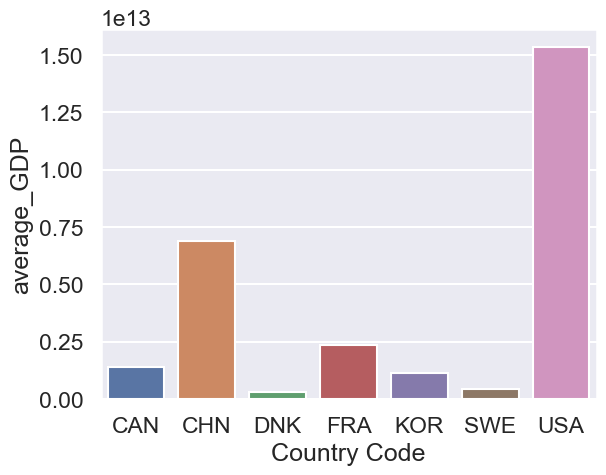

In [20]:
def two_to_three_code(code):
    country_obj = pycountry.countries.get(alpha_2=code.upper())
    return str.upper(country_obj.alpha_3)

top_countries = ['kr', 'cn', 'us', 'se', 'fr', 'ca', 'dk', 'tw']

top_countries_three_letter_codes = map(two_to_three_code, top_countries)
s = set(top_countries_three_letter_codes)

top_countries_gdp = GDP_with_average[GDP_with_average['Country Code'].isin(s)]

sns.barplot(data = top_countries_gdp, x = 'Country Code', y = 'average_GDP')




Here we can see that The USA has had the highest average GDP  from years 1998 - 2020 and that China is in second and most likely behind due to the earlier years of lower GDP.  It appears that Denmark (DNK) and Sweden (SWE) have the lowest GDP.  Korea also has a relatively low GDP hovering around .13*10^13.

We should investigate the GDP dataset more, because we think that it takes the opinion that Taiwan is not a country based on the fact that TW was in the esports dataset but not the GDP dataset.

The potential meaning to this is due to the high income generated by Esports players, the focus of Korean youth may have been to engage more into an industry with high earnings 



<AxesSubplot: xlabel='CountryCode', ylabel='TotalUSDPrize'>

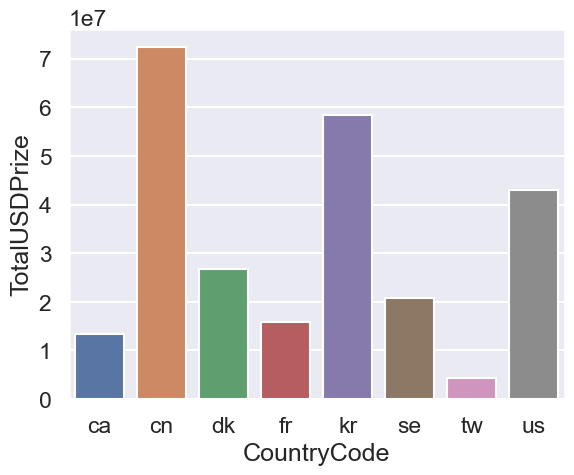

In [21]:
#earning_top_countries.groupby(['CountryCode'])['TotalUSDPrize'].transform('sum')

earnings = earning_top_countries.groupby('CountryCode')['TotalUSDPrize'].sum()
sns.barplot(x = earnings.index, y = earnings)


Here, we see something suprising.  It turns out that the Chinese (CN) actually collect the most winnings in esports.  This is followed up by Korea (KR) and then the US.

The other countries did not suprise us.  For example, on the lower end; to us, it made sense that Taiwan had a lower total prize earning, as it is a smaller country.  

We should perhaps chop off the years before 2010 if we want to have a more accurate GDP vs e-sports earning comparison, as many of these countries and esports as a whole a meteoric rise post 2010.




In [22]:
earnings_values = earnings.values
earnings_values = np.delete(earnings_values, -2)
top_countries_gdp['esports-earnings'] = earnings_values

<AxesSubplot: xlabel='average_GDP', ylabel='esports-earnings'>

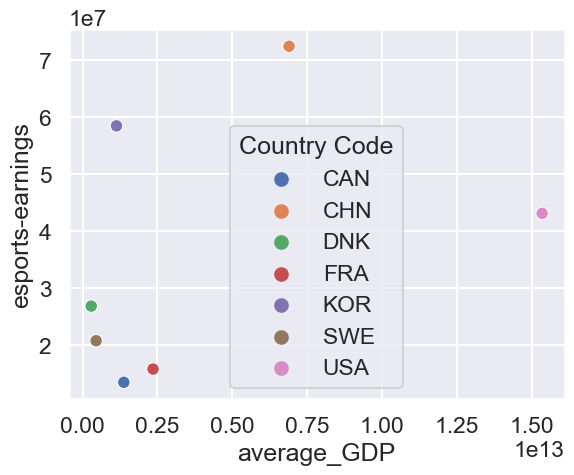

In [23]:
sns.scatterplot(data = top_countries_gdp, x = "average_GDP", y='esports-earnings', hue='Country Code')

Here, we can see the average GDP of a country plotted against how much their highest earning players have earned.  We can see that the USA has the largest GDP, but not the largest esports earnings, but China, despite having a modest average GDP, has the highest esports earnings.

This is interesting to us because initially we thought that Korea would have the highest total esports earnings, and didn't even consider China to outcompete it in terms of earnings.

In order to find an answer to our questions regarding Korean's stellar performance in esports, it's possible that China's stellar performance works to defy the hypothesis, as perhaps Korea is no longer the anomaly we intially thought it was

In [24]:
#now we take the data from the screen time csv and put it into a df
screen_time = pd.read_csv("data/screen-time.csv")
screen_time.head(20)
#print(screen_time['Country'].to_string(index=False))

#give the df some country codes
def country_name_to_three_code(country_name):
    country_obj = pycountry.countries.search_fuzzy(country_name)[0]
    # country_obj = pycountry.countries.get(name=country_name)
    return str.upper(country_obj.alpha_3)


screen_time["Country Code"] = screen_time['Country'].apply(country_name_to_three_code)
# top_countries = ['kr', 'cn', 'us', 'se', 'fr', 'ca', 'dk', 'tw']

# top_countries_three_letter_codes = map(two_to_three_code, top_countries)
# s = set(top_countries_three_letter_codes)

# top_countries_gdp = GDP_with_average[GDP_with_average['Country Code'].isin(s)]
screen_time.head(20)


,Country,Internet via Computer,Country Code
0,Argentina,4.34,ARG
1,Australia,3.24,AUS
2,Austria,3.13,AUT
3,Belgium,3.25,BEL
4,Brazil,4.54,BRA
5,Canada,3.54,CAN
6,China,2.09,CHN
7,Colombia,4.54,COL
8,Denmark,2.50,DNK
9,Egypt,3.37,EGY


In [25]:
top_countries_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,average_GDP,esports-earnings
35,Canada,CAN,GDP (current US$),NY.GDP.MKTP.CD,6.340000e+11,6.784122e+11,7.447734e+11,7.389818e+11,7.606493e+11,8.955406e+11,1.026690e+12,1.173109e+12,1.319265e+12,1.468820e+12,1.552990e+12,1.374625e+12,1.617343e+12,1.793327e+12,1.828366e+12,1.846597e+12,1.805750e+12,1.556509e+12,1.527995e+12,1.649266e+12,1.725329e+12,1.742015e+12,1.645423e+12,1.990762e+12,NaN,1.379022e+12,13483648.61
40,China,CHN,GDP (current US$),NY.GDP.MKTP.CD,1.029043e+12,1.093997e+12,1.211347e+12,1.339396e+12,1.470550e+12,1.660288e+12,1.955347e+12,2.285966e+12,2.752132e+12,3.550343e+12,4.594307e+12,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13,NaN,6.894297e+12,72391878.56
58,Denmark,DNK,GDP (current US$),NY.GDP.MKTP.CD,1.769919e+11,1.779652e+11,1.641587e+11,1.647914e+11,1.786352e+11,2.180960e+11,2.513730e+11,2.644673e+11,2.828849e+11,3.194234e+11,3.533610e+11,3.212413e+11,3.219953e+11,3.440031e+11,3.271489e+11,3.435844e+11,3.529936e+11,3.026731e+11,3.131159e+11,3.321211e+11,3.568412e+11,3.475613e+11,3.560849e+11,3.971043e+11,NaN,2.903590e+11,26840800.02
77,France,FRA,GDP (current US$),NY.GDP.MKTP.CD,1.503109e+12,1.493152e+12,1.365640e+12,1.377657e+12,1.501409e+12,1.844545e+12,2.119633e+12,2.196945e+12,2.320536e+12,2.660591e+12,2.930304e+12,2.700887e+12,2.645188e+12,2.865158e+12,2.683672e+12,2.811877e+12,2.855964e+12,2.439189e+12,2.472964e+12,2.595151e+12,2.790957e+12,2.728870e+12,2.630318e+12,2.937473e+12,NaN,2.352966e+12,15803240.18
126,"Korea, Rep.",KOR,GDP (current US$),NY.GDP.MKTP.CD,3.833309e+11,4.975127e+11,5.761781e+11,5.476582e+11,6.272461e+11,7.027173e+11,7.931750e+11,9.349011e+11,1.053217e+12,1.172614e+12,1.047339e+12,9.439419e+11,1.144067e+12,1.253223e+12,1.278428e+12,1.370795e+12,1.484318e+12,1.465773e+12,1.500112e+12,1.623901e+12,1.724846e+12,1.651423e+12,1.637896e+12,1.798534e+12,NaN,1.133881e+12,58441733.71


In [26]:
mega_df = pd.merge(screen_time, top_countries_gdp, on='Country Code')


In [27]:
mega_df.head()
mega_df.rename(columns={"Internet via Computer": "screen_time", "esports-earnings": "earnings"}, inplace=True)
#mega_df.rename_column("Internet via Computer", "screen_time")

In [28]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'earnings ~ screen_time + average_GDP', data = mega_df)
results_formula = model.fit()
print(results_formula.summary())


                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     10.42
Date:                Fri, 09 Dec 2022   Prob (F-statistic):             0.0259
Time:                        18:46:34   Log-Likelihood:                -121.59
No. Observations:                   7   AIC:                             249.2
Df Residuals:                       4   BIC:                             249.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.266e+08   2.44e+07      5.200      

c:\Users\Eric\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


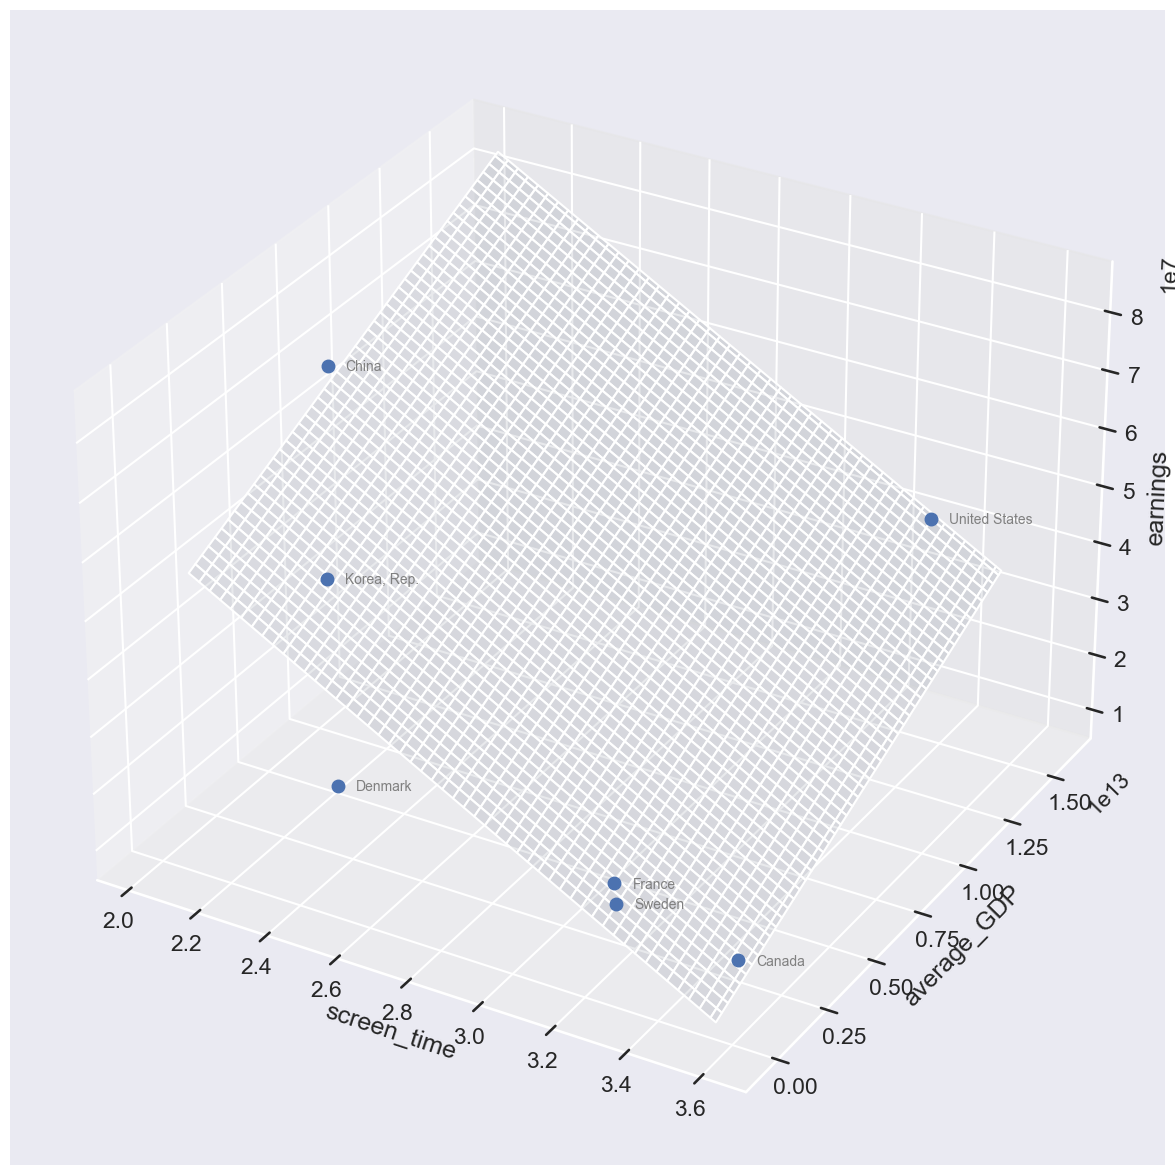

In [29]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(mega_df.screen_time.min(), mega_df.screen_time.max(), 100),np.linspace(mega_df.average_GDP.min(), mega_df.average_GDP.max(), 100))
onlyX = pd.DataFrame({'screen_time': x_surf.ravel(), 'average_GDP': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)



## convert the predicted result in an array
fittedY=np.array(fittedY)




# Visualize the Data for Multiple Linear Regression
# fig,ax = plt.subplots(figsize =(25, 8))

fig = plt.figure(figsize =(35, 15))
ax = fig.add_subplot(111, projection='3d', xmargin = 0.1, ymargin=.1)
ax.plot(xs = mega_df['screen_time'],ys = mega_df['average_GDP'], zs =mega_df['earnings'], color="b", marker="o", linestyle = 'None')
style = dict(size=10, color='gray')
for screen_time, average_GDP, earnings, country_name in zip(mega_df['screen_time'],mega_df['average_GDP'], mega_df['earnings'], mega_df['Country Name']):
    ax.text(screen_time + .05, average_GDP, earnings, s =country_name, **style)
# ax.text('2012-7-4', , "Independence Day", ha='center', **style)
# ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
# ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
# ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
# ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

#might have to change c below, see if we can change it based on some country code....
#ax.scatter(mega_df['screen_time'],mega_df['average_GDP'],mega_df['earnings'],c='red', marker='o', alpha=0.8)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.1)
ax.set_xlabel('screen_time')
ax.set_ylabel('average_GDP')
ax.set_zlabel('earnings')
plt.show()

In this graph, we see a plane generated by multiple linear regression, which basically atttempts to predict how much a nation would earn in esports prize money given their GDP and the average number of time that a citizen spends in front of the computer on the internet per day.

In [30]:
from matplotlib import animation
def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, frames=120, interval=60, blit=True)
# Save


writergif = animation.PillowWriter(fps=20)
anim.save('extendedRevolution.gif',writer=writergif)


![Gif](extendedRevolution.gif)

Above (or at https://github.com/COGS108/Group_101-Fa22/blob/finalProject/extendedRevolution.gif), you can see the multiple linear regression graph rotating.  The countries with their dots above the plane are countries that earn more than the model would predict, and the countries below the plane (z-axis) are those that under perform.

In [31]:
from statsmodels.stats.outliers_influence import OLSInfluence

# compute the residuals and other metrics
influence = OLSInfluence(results_formula)


#how much the data point influenced the graph
# print(influence.influence)

for country_name, influence, resid_std in zip(mega_df['Country Name'], influence.influence, influence.resid_std):
    print(country_name + ' has a influence of ' + str(influence))
    # + ' and is ' + str(resid_std) +' standard deviations away from the plane in terms of residuals')


Canada has a influence of 3615595.881730511
China has a influence of 4063612.735122849
Denmark has a influence of -6122019.351597015
France has a influence of -2004525.8651259858
Korea, Rep. has a influence of 5158029.396629291
Sweden has a influence of 1913571.8111191369
United States has a influence of -11205622.333737897


FINAL ANALYSIS:  Here we can see how much each country influenced the plane/how much they lie above/below the plane.

We can see that the results are pretty much as expected.  South Korea pulled the plane up the hardest, indicating that South Korea was the greatest outlier in terms of esports earnings amongst the countries given it's GDP and citizen's average computer time.

We can see that China also greatly exceeds the models/plane's expectations which was expected due to the fact that we found that it was overperforming in respect to esports earnings to average GDP in our EDA.

We can also note that the model actually overpredicts Denmark's esports earnings, which can be seen in the GIF above, where Denmark has a dot much below the plane.

# Ethics & Privacy

Coming off the tail of this experiment, in terms of ethics and privacy, we do not have many concerns.


At the beginning of our proposal, we stated "As long as the data is anonymized, we do not see a big ethcical concern in the question asked and data collection process.  We do not think that our question is inherently harmful and the nature of our data collection is objective, thus, it should be hard to skew in an unethical manner.  We are afrain however that the data being used, analysis, post-analysis might fall victim to our own personal biases because we are people with flaws who are seeking out the data and will be making judgements about the data."  

And we believe that we have followed this mantra by taking data that was not tracable back to individuals, remaining vigialant when performing analysis to only make judgements based on the numbers at hand, and considering potential biases that could have leaked into the data.

# Conclusion & Discussion

We always suspected that Korea was a professional gaming powerhouse, consistently producing countless top-tier players across all genres of video games. Knowing this, we wondered whether or not Korean gamers have generally outperformed gamers from other countries overall during competition. To be able to figure out whether or not our suspicions were correct, we used various datasets such as GDP, average computer screen time per capita, and Esports tournament player/teams datasets to answer this question.

We did our analysis by first cleaning our dataset. We first noticed that our result containing DOTA 2 was dominating the team’s / individual ‘s earning data. Therefore we removed DOTA from the dataset as it could potentially become a massive outlier. This is mainly due to the fact that DOTA has a disproportionately massive, uniquely crowd-funded prize pool and belongs to a very specific genera of MOBA in Esports Gaming. We also cleaned up the GDP datasets as it contained data before 1997, which we removed because our Esports datasets do not contain any data points pre 1997. Then we made sure that there were no null values in any of the datasets. After cleaning the datasets, we then performed exploratory data analysis. We made several graphs with these data frames. From these graphs we can observe that even though South Korea has the highest number of players and their players fall among the highest income earners per individual player, the two outlier players with the highest income are from Denmark and France. What they lack in peak earnings, they make up with consistency. 

For analysis, we used multiple OLS regression, looking for a relationship between esports earnings and GDP/screen time per capita. The results output a 3D graph, representing the relation between the three variables, with x, y, z axis corresponding to each. From the graph, we observed that South Korea is the highest above the plane, followed by China. We then used OLSInfluence to calculate residuals of the points on the graph. From this, we calculated that South Korea had the highest influence among the data points, closely trailed by China. This provides evidence within our research question, that South Korea has a significant anomaly in esport earnings. Overall, we conclude that the results were clearly fair enough to indicate that South Korea’s esports earnings exceed the amount we predicted it should have according to its GDP and average screen time per capita. There is a significant difference between South Korea’s actual esport earnings and our prediction Plane which leads to a strong conclusion. 

A limitation we faced while doing this project was finding limited available datasets that were relevant to our research question. We expected esports data to be highly accessible beforehand since all matches are online. Contrary to our expectations, many datasets of interest were locked behind paywalls, and data in general was not as openly available as we hoped.

All in all, we found that South Korea is a distinct outlier in terms of professional gaming performance. Even China was shown to be a cut above the rest in regards to expected earnings performance. We believe that this is due in part to the difference in cultural norms between Western/European and Asian countries. Traditional physical sports are deeply rooted in Western and European culture. While physical sports may be nearly as prevalent in South Korea and China as well, East Asia seems to welcome esports as a career that is equivalent in prestige and respect to traditional sports. The top professional gamers in South Korea, for example, are just as universally revered as musical idols and physical sports stars. In contrast, professional gaming as a career in the United States and many European countries is frequently ridiculed by ardent fans of physical sports or those who are generally unaware about the gaming industry. Our research here can be applied to improve the growth of the esports industry in the US. A culture shift may be needed for the US to mirror the explosive growth of the esports industry as seen in South Korea or China.


# Team Contributions

*Specify who in your group worked on which parts of the project.*


Jason - Code for checkpoints 1, 2 and the final.  Strong participant in discussion and brought a couple of graphs home for the group.  Also dug around to find the coutries module.